Import Libraries

In [1]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Load and Preprocess the Data

In [2]:
# Load the dataset
file_path = 'GOOGL_2006-01-01_to_2018-01-01.csv'
df1 = pd.read_csv(file_path, parse_dates=['Date'])  # Parse 'Date' as datetime
df1.set_index('Date', inplace=True)  # Set 'Date' as the index
df1 = df1.drop('Name', axis=1)  # Drop unnecessary 'Name' column

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df1.values)



Prepare Sequences for LSTM

In [3]:
# Define sequence length
sequence_length = 100

# Prepare input (X) and output (Y) sequences
X, Y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i + sequence_length])  # Input: sequence_length x num_features
    Y.append(data_normalized[i + sequence_length])    # Output: num_features

X = np.array(X)  # Shape: (samples, sequence_length, num_features)
Y = np.array(Y)  # Shape: (samples, num_features)

Split Data into Training and Testing Sets

In [4]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]



Build and Compile the LSTM Model

In [5]:
# Build the LSTM model for multivariate input/output
model = Sequential([
    LSTM(units=80, input_shape=(sequence_length, X.shape[2])),  # Sequence length and features
    Dense(units=Y.shape[1])  # Number of output features
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the LSTM Model

In [6]:
# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0124
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.2351e-04
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5090e-04
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4299e-04
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.5446e-04
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9962e-04
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2370e-04
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4030e-04
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2002e-04
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8017e-04
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1351e-04
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5054e-04
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6165e-04
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7966e-04
Epoch

Predict on the Test Set

In [7]:
# Predict on the test set
predictions = model.predict(X_test)

# Inverse scale predictions and actual values for evaluation
predictions_rescaled = scaler.inverse_transform(predictions)
Y_test_rescaled = scaler.inverse_transform(Y_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(Y_test_rescaled, predictions_rescaled)
print(f"Mean Squared Error: {mse}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 105070723709.2217


 Visualize Actual vs Predicted

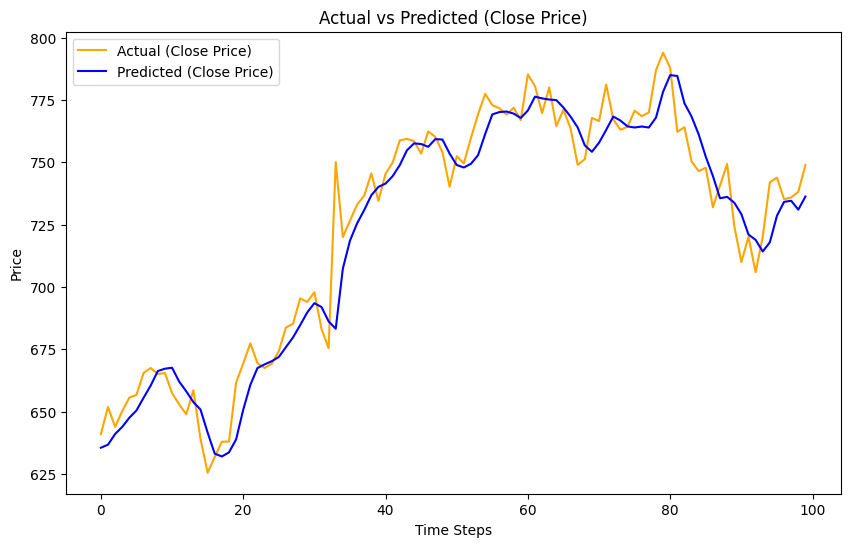

In [8]:
# Plot Actual vs Predicted (Close Price)
plt.figure(figsize=(10, 6))
plt.plot(Y_test_rescaled[:100, 0], label='Actual (Close Price)', color='orange')
plt.plot(predictions_rescaled[:100, 0], label='Predicted (Close Price)', color='blue')
plt.legend()
plt.title("Actual vs Predicted (Close Price)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.show()

Forecast Future Values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

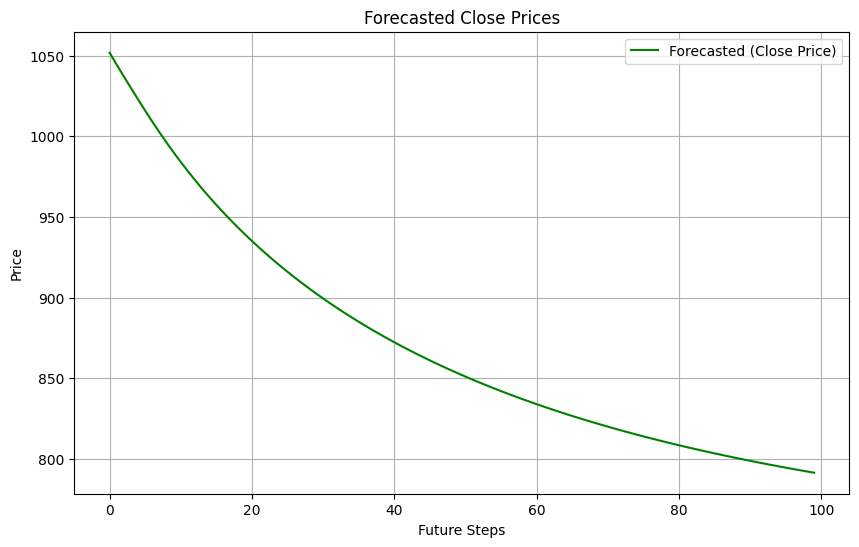

In [9]:
# Forecasting future values
forecast_input = X_test[-1]  # Initialize with the last sequence from the test set
forecast_steps = 100  # Number of future steps to forecast
forecasts = []

for _ in range(forecast_steps):
    forecast_input_reshaped = forecast_input.reshape(1, sequence_length, X.shape[2])
    forecast = model.predict(forecast_input_reshaped)[0]
    forecasts.append(forecast)
    forecast_input = np.vstack([forecast_input[1:], forecast])  # Update the input sequence

# Convert forecasts to the original scale
forecasts_rescaled = scaler.inverse_transform(np.array(forecasts))  # Rescale forecasts to original values
print("Forecasts (original scale):")
print(forecasts_rescaled)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecasts_rescaled[:, 0], label='Forecasted (Close Price)', color='green')
plt.title("Forecasted Close Prices")
plt.xlabel("Future Steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


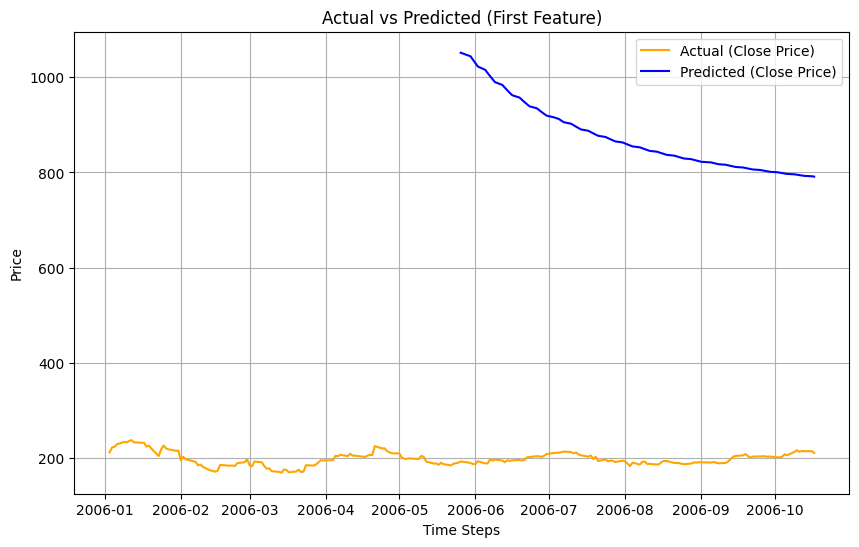

In [10]:
# Plot Actual vs Predicted (First Feature)
plt.figure(figsize=(10, 6))
plt.plot(df1.index[:200], df1.values[:200, 0], label='Actual (Close Price)', color='orange')  # Actual first feature
plt.plot(df1.index[100:200], forecasts_rescaled[:, 0], label='Predicted (Close Price)', color='blue')  # Predicted first feature
plt.legend()
plt.title("Actual vs Predicted (First Feature)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.grid(True)
plt.show()
